# Project: Wrangling and Analyze Data

## Data Gathering


In [1]:
#importing required packages

import pandas as pd
import numpy as np
import requests
import json

In [2]:
#loading in the twitter_archive dataset
dog_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [7]:
dog_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


 Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#lets use the request library to import the image_prediction dataset

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)
image_prediction = url.split('/')[-1]

with open(image_prediction, 'wb') as file:
    file.write(r.content)

In [4]:
#then we read it as a dataset
image_predict = pd.read_table('image-predictions.tsv')

In [5]:
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


 Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt) provided

In [6]:
#lets load in the tweet_json.txt

with open("tweet-json.txt", 'r') as file:
    lines = file.readlines()

data = []
for line in lines:
    data.append(json.loads(line))
    
dog_tweet = pd.DataFrame(data)

In [102]:
dog_tweet.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data


 ## using visual assessment to access

In [7]:
dog_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
image_predict.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
dog_tweet.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## using programmatic assessment

In [33]:
dog_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [34]:
#finding unique values for the rating_numerator
dog_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
#finding unique values for rating_denominators
dog_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
#checking for uniqueness in the names
dog_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
Buddy         7
an            7
Bailey        7
Toby          7
Daisy         7
Dave          6
Jack          6
Scout         6
Rusty         6
Leo           6
Milo          6
Koda          6
Bella         6
Stanley       6
Oscar         6
Jax           6
Gus           5
           ... 
Daniel        1
Nugget        1
Sora          1
Ridley        1
Rolf          1
Richie        1
Sobe          1
Blanket       1
Willie        1
Bilbo         1
Trigger       1
Jonah         1
Comet         1
Charl         1
Dex           1
Howie         1
General       1
Rose          1
Maxwell       1
Socks         1
Cal           1
Stormy        1
Jeffri        1
Shooter       1
Dale          1
Smiley        1
Kulet         1
Murphy        1
Harrison      1
Frönq         1
Name: name, Length: 957,

In [16]:
sum(dog_archive.duplicated())

0

In [15]:
sum(dog_archive.isnull().any())

6

In [18]:
dog_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
dog_archive.shape

(2356, 17)

In [20]:
#now lets access our image_prediction data
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [35]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predict.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [21]:
#checking for duplicates
sum(image_predict.duplicated())

0

In [22]:
#checking for any null values
sum(image_predict.isnull().any())

0

In [10]:
image_predict.shape

(2075, 12)

In [36]:
#now lets check the tweet_json dataset
dog_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [18]:
dog_tweet.shape

(2354, 31)

In [38]:
dog_tweet.sample()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1843,None,None,Sun Dec 13 01:12:15 +0000 2015,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675845652761468928, 'id_str'...",2477,False,This is Pepper. She's not fully comfortable ri...,None,...,False,NaN,NaN,NaN,1000,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [43]:
dog_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [47]:
dog_tweet.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
316,None,None,Thu Feb 23 15:25:23 +0000 2017,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 834786230550290432, 'id_str'...",22943,False,This is Tobi. She is properly fetching her sho...,None,...,False,NaN,NaN,NaN,6159,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
471,None,None,Wed Jan 04 01:05:59 +0000 2017,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 816450564926164996, 'id_str'...",33961,True,Meet Moose. He doesn't want his friend to go b...,None,...,False,NaN,NaN,NaN,9366,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1232,None,None,Wed Mar 23 19:09:09 +0000 2016,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 712717831029202944, 'id_str'...",13474,False,Please don't send in any more polar bears. We ...,None,...,False,NaN,NaN,NaN,5616,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2251,None,None,Fri Nov 20 19:55:30 +0000 2015,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667793397835542529, 'id_str'...",736,False,Dogs only please. Small cows and other non can...,None,...,False,NaN,NaN,NaN,358,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
930,None,None,Fri Jul 15 17:56:40 +0000 2016,"[0, 81]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 754011783938117632, 'id_str'...",9726,False,This is Charlie. He pouts until he gets to go ...,None,...,False,NaN,NaN,NaN,4079,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Quality issues

1. 'dog_tweet': the dtype for the created_at is an object instead of datetime64

2. 'dog_archive': the timestamp column is an object rather than datetime64

3. 'dog_archives': there are tweet_id without images

4. 'dog_archives':  we dont need the in replies_status_id and retweets_status_id

5. incorrect datatype for dog_archive, dog_tweet and image predict tweet_id

6. 'dog_tweet': Drop columns with few data points and non-uniqueness in them

7. 'image_prediction': extracting dog breed from image_prediction

8. The content in the Source has HTML Tag


### Tidiness issues
1. dog_archives: the dog stages are splittered into different

2. dog_tweet should be part of the dog_archive

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [9]:
# Make copies of original pieces of data
dog_archive_clean = dog_archive.copy()
image_predict_clean = image_predict.copy()
tweet_clean = dog_tweet.copy()


### Quality issues


### Issue #1: 'dog_tweet' : wrong datatype for created_at column


#### Define: change the data type from object to datetime 

#### Code

In [10]:
#changing the dtype of the created_at column 
tweet_clean['created_at'] = pd.to_datetime(tweet_clean['created_at'])

#### Test

In [107]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-

 we can see that the dtypes of the created_at column has changed

### Issue #2: 'dog_archive': the timestamp column is an object rather than datetime64


#### Define: change the datatype from object to datetime 

#### Code

In [11]:
dog_archive_clean['timestamp'] = pd.to_datetime(dog_archive_clean['timestamp'])

#### Test

In [109]:
dog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #3: 'dog_archive': there are tweet_id without images


#### Define: remove tweet_id without images

#### Code

In [12]:
dog_archive_clean=dog_archive_clean[dog_archive_clean["expanded_urls"].notna()]

#### Test

In [88]:
dog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: float64(4), int64(3), ob

### Issue #4: 'dog_archive': we dont need the in replies_status_id and retweets_status_id


#### Define: remove retweets_id and in replies from the dataset

#### Code

In [13]:
dog_archive_clean= dog_archive_clean[dog_archive_clean['retweeted_status_id'].isnull()]
dog_archive_clean = dog_archive_clean[dog_archive_clean['in_reply_to_status_id'].isnull()]


#### Test

In [112]:
dog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: datetime64[ns](1), float

### Issue #5: incorrect datatype for dog_archive, dog_tweet and image predict tweet_id


#### Define: change all id dtypes to strings

#### Code

In [14]:
dog_archive_clean['tweet_id'] = dog_archive_clean['tweet_id'].astype('str')
tweet_clean['id'] = tweet_clean['id'].astype('str')
image_predict_clean['tweet_id'] = image_predict_clean['tweet_id'].astype('str')

#### Test

In [15]:
dog_archive_clean.tweet_id.dtypes
tweet_clean.id.dtypes
image_predict.tweet_id.dtypes

dtype('int64')

### Issue #6:  'dog_tweet':  few data points and non-uniqueness in them



#### Define: drop columns in the dog_archive and dog_tweet

#### Code


In [16]:
tweet_clean.rename({'id': 'tweet_id'}, axis=1, inplace =True)


In [17]:
drop_columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_denominator']
dog_archive_clean=dog_archive_clean.drop(drop_columns, axis=1)


In [18]:
tweet_clean = tweet_clean [['tweet_id', 'favorite_count', 'retweet_count']]


#### Test

In [96]:
dog_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [63]:
tweet_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

### Issue #7: extracting dog breed from image_prediction

#### Define: getting the dog breed

#### Code

In [19]:
maxconf=[]
def max_conf(row):
    '''
    A function that returns maximum confidence valus for true prediction
    
    '''
    if row['p1_dog']==True and row['p2_dog']==True and row['p3_dog']==True :
        max_cof=row[['p1_conf', 'p2_conf', 'p3_conf']].max()
        maxconf.append(max_cof)
       
    elif row['p1_dog']==True and row['p2_dog']==True and row['p3_dog']==False:
        max_cof=row[['p1_conf', 'p2_conf']].max()
        maxconf.append(max_cof)
    elif row['p1_dog']==True and row['p2_dog']==False and row['p3_dog']==True:
        max_cof=row[['p1_conf', 'p3_conf']].max()
        maxconf.append(max_cof)
    elif row['p1_dog']==False and row['p2_dog']==True and row['p3_dog']==True:
        max_cof=row[['p2_conf', 'p3_conf']].max()
        maxconf.append(max_cof)
    elif row['p1_dog']==True and row['p2_dog']==False and row['p3_dog']==False:
        maxconf.append(row['p1_conf'])
    elif row['p1_dog']==False and row['p2_dog']==True and row['p3_dog']==False:
        maxconf.append(row['p2_conf'])
    elif row['p1_dog']==False and row['p2_dog']==False and row['p3_dog']==True:
        maxconf.append(row['p3_conf'])
    else:
        maxconf.append(0.0000)
    return maxconf

image_predict_clean.apply(max_conf, axis = 1)

image_predict_clean['confidence'] = maxconf


In [20]:
image_predict_clean.describe()

,img_num,p1_conf,p2_conf,p3_conf,confidence
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2075.000000
mean,1.203855,0.594548,1.345886e-01,6.032417e-02,0.463269
std,0.561875,0.271174,1.006657e-01,5.090593e-02,0.339216
min,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,1.000000,0.364412,5.388625e-02,1.622240e-02,0.139761
50%,1.000000,0.588230,1.181810e-01,4.944380e-02,0.457117
75%,1.000000,0.843855,1.955655e-01,9.180755e-02,0.772790
max,4.000000,1.000000,4.880140e-01,2.734190e-01,0.999956


In [21]:
dog_breed= []
def breed(row):
    '''
    A function that takes breed that has the highest confidence as the breed
    
    '''
    if row['p1_dog']==True and row['p2_dog']==True and row['p3_dog']==True :
        if row['confidence']==row['p1_conf']:
            dog_breed.append(row['p1'])

        elif row['confidence']==row['p2_conf']:
            dog_breed.append(row['p2'])
    
        else:
            dog_breed.append(row['p3'])
        
    elif row['p1_dog']==True and row['p2_dog']==True and row['p3_dog']==False:
        if row['confidence']==row['p1_conf']:
            dog_breed.append(row['p1'])
    
        else:
            dog_breed.append(row['p2'])
    elif row['p1_dog']==True and row['p2_dog']==False and row['p3_dog']==True:
        if row['confidence']==row['p1_conf']:
            dog_breed.append(row['p1'])
        else:
            dog_breed.append(row['p3'])
            
    elif row['p1_dog']==False and row['p2_dog']==True and row['p3_dog']==True:
        if row['confidence']==row['p2_conf']:
            dog_breed.append(row['p2'])
        else:
            dog_breed.append(row['p3'])
            
            
    elif row['p1_dog']==True and row['p2_dog']==False and row['p3_dog']==False:
        dog_breed.append(row['p1'])
    elif row['p1_dog']==False and row['p2_dog']==True and row['p3_dog']==False:
        dog_breed.append(row['p2'])    
    elif row['p1_dog']==False and row['p2_dog']==False and row['p3_dog']==True:
        dog_breed.append(row['p3'])
        
    else:
        dog_breed.append('Unknown')
        
    return dog_breed

In [22]:
image_predict_clean.apply(breed, axis = 1)

image_predict_clean['dog_breeds'] = dog_breed


In [23]:
image_predict_clean.query("dog_breeds=='Unknown'").head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,confidence,dog_breeds
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,0.0,Unknown
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False,0.0,Unknown
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False,0.0,Unknown
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False,0.0,Unknown
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False,0.0,Unknown
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False,0.0,Unknown
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,0.000055,False,acorn,0.000026,False,0.0,Unknown
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,0.114071,False,common_iguana,0.043255,False,0.0,Unknown
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False,0.0,Unknown
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,0.012601,False,coyote,0.000057,False,0.0,Unknown


*  we choose only columns relevant for analysis

In [24]:
image_predict_clean= image_predict_clean[['tweet_id','jpg_url', 'dog_breeds', 'confidence']].copy()


#### Test

In [103]:
image_predict_clean.sample()

,tweet_id,jpg_url,dog_breeds,confidence
1854,841077006473256960,https://pbs.twimg.com/media/C6wbE5bXUAAh1Hv.jpg,Brittany_spaniel,0.962985


### Issue #8: The content in the Source has HTML Tag



#### Define: Extracting content from a tag in source column

#### Code

In [25]:
from bs4 import BeautifulSoup

In [26]:
dog_archive_clean.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1962
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [27]:
dog_archive_clean['content']=dog_archive_clean['source'].apply(lambda x: BeautifulSoup(x,"lxml").find('a').contents[0])


In [28]:
dog_archive_clean['link']=dog_archive_clean['source'].apply(lambda x: BeautifulSoup(x,"lxml").find('a')['href'])


#### Test

In [115]:
dog_archive_clean.sample()


,tweet_id,timestamp,source,text,rating_numerator,name,doggo,floofer,pupper,puppo,content,link
362,829449946868879360,2017-02-08 22:00:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a stressed doggo. Had a long day. Many ...,11,None,doggo,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone


## Tidiness issue

### Issue #1: dog_archive: the dog stages are splittered into different columns

#### Define: using the melt function to create a new column for the different dog stages

#### Code

In [29]:
dog_archive_clean.doggo.replace('None', '', inplace=True)
dog_archive_clean.pupper.replace('None', '', inplace=True)
dog_archive_clean.floofer.replace('None', '', inplace=True)
dog_archive_clean.puppo.replace('None', '', inplace=True)

In [30]:
dog_archive_clean['stage'] = dog_archive_clean.doggo + dog_archive_clean.floofer + dog_archive_clean.pupper + dog_archive_clean.puppo

In [31]:
dog_archive_clean.loc[dog_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
dog_archive_clean.loc[dog_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
dog_archive_clean.loc[dog_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'


In [32]:
dog_archive_clean.stage.replace({'': np.nan}, inplace=True)

In [40]:
dog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id            2094 non-null object
timestamp           2094 non-null datetime64[ns]
source              2094 non-null object
text                2094 non-null object
rating_numerator    2094 non-null int64
name                2094 non-null object
doggo               2094 non-null object
floofer             2094 non-null object
pupper              2094 non-null object
puppo               2094 non-null object
content             2094 non-null object
link                2094 non-null object
stage               335 non-null object
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 309.0+ KB


In [45]:
dog_archive_clean.drop(['doggo', 'pupper', 'floofer', 'puppo'], axis = 1, inplace = True)

#### Test

In [46]:
dog_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,name,content,link,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,Phineas,Twitter for iPhone,http://twitter.com/download/iphone,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,Tilly,Twitter for iPhone,http://twitter.com/download/iphone,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,Archie,Twitter for iPhone,http://twitter.com/download/iphone,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,Darla,Twitter for iPhone,http://twitter.com/download/iphone,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,Franklin,Twitter for iPhone,http://twitter.com/download/iphone,NaN


### Issue #2: dog_tweet and the image_prediction should be part of the dog_archive

#### Define : merge the dog_tweet and the image_predict with the dog_archive

#### Code

In [47]:
dog_combined = pd.merge(dog_archive_clean, tweet_clean, how='inner',
                                      left_on=['tweet_id'], right_on=['tweet_id'])

In [48]:
dogs_archive_masters = pd.merge(dog_combined, image_predict_clean, how='inner',
                  left_on=['tweet_id'], right_on=['tweet_id'])
dogs_archive_masters.drop_duplicates()

,tweet_id,timestamp,source,text,rating_numerator,name,content,link,stage,favorite_count,retweet_count,jpg_url,dog_breeds,confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,Phineas,Twitter for iPhone,http://twitter.com/download/iphone,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,Tilly,Twitter for iPhone,http://twitter.com/download/iphone,NaN,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,Archie,Twitter for iPhone,http://twitter.com/download/iphone,NaN,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,Darla,Twitter for iPhone,http://twitter.com/download/iphone,NaN,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,Franklin,Twitter for iPhone,http://twitter.com/download/iphone,NaN,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,None,Twitter for iPhone,http://twitter.com/download/iphone,NaN,20562,3261,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,Jax,Twitter for iPhone,http://twitter.com/download/iphone,NaN,12041,2158,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,None,Twitter for iPhone,http://twitter.com/download/iphone,NaN,56848,16716,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,Zoey,Twitter for iPhone,http://twitter.com/download/iphone,NaN,28226,4429,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,Cassie,Twitter for iPhone,http://twitter.com/download/iphone,doggo,32467,7711,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319


#### Test

In [49]:
dogs_archive_masters.head(10)

,tweet_id,timestamp,source,text,rating_numerator,name,content,link,stage,favorite_count,retweet_count,jpg_url,dog_breeds,confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,Phineas,Twitter for iPhone,http://twitter.com/download/iphone,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,Tilly,Twitter for iPhone,http://twitter.com/download/iphone,NaN,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,Archie,Twitter for iPhone,http://twitter.com/download/iphone,NaN,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,Darla,Twitter for iPhone,http://twitter.com/download/iphone,NaN,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,Franklin,Twitter for iPhone,http://twitter.com/download/iphone,NaN,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,None,Twitter for iPhone,http://twitter.com/download/iphone,NaN,20562,3261,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,Jax,Twitter for iPhone,http://twitter.com/download/iphone,NaN,12041,2158,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,None,Twitter for iPhone,http://twitter.com/download/iphone,NaN,56848,16716,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,Zoey,Twitter for iPhone,http://twitter.com/download/iphone,NaN,28226,4429,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,Cassie,Twitter for iPhone,http://twitter.com/download/iphone,doggo,32467,7711,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319


In [50]:
dogs_archive_masters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 14 columns):
tweet_id            1971 non-null object
timestamp           1971 non-null datetime64[ns]
source              1971 non-null object
text                1971 non-null object
rating_numerator    1971 non-null int64
name                1971 non-null object
content             1971 non-null object
link                1971 non-null object
stage               303 non-null object
favorite_count      1971 non-null int64
retweet_count       1971 non-null int64
jpg_url             1971 non-null object
dog_breeds          1971 non-null object
confidence          1971 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 231.0+ KB


In [132]:
sum(dogs_archive_masters.duplicated())


0

In [133]:
dogs_archive_masters.drop_duplicates()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stages,stages,favorite_count,retweet_count,jpg_url,dog_breeds,confidence
0,892420643555336193,2017-08-01 16:23:56,13,NaN,Phineas,doggo,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
1,892420643555336193,2017-08-01 16:23:56,13,NaN,Phineas,floofer,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
2,892420643555336193,2017-08-01 16:23:56,13,NaN,Phineas,pupper,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
3,892420643555336193,2017-08-01 16:23:56,13,NaN,Phineas,puppo,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
4,892177421306343426,2017-08-01 00:17:27,13,NaN,Tilly,doggo,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
5,892177421306343426,2017-08-01 00:17:27,13,NaN,Tilly,floofer,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
6,892177421306343426,2017-08-01 00:17:27,13,NaN,Tilly,pupper,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
7,892177421306343426,2017-08-01 00:17:27,13,NaN,Tilly,puppo,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
8,891815181378084864,2017-07-31 00:18:03,12,NaN,Archie,doggo,None,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
9,891815181378084864,2017-07-31 00:18:03,12,NaN,Archie,floofer,None,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012


In [75]:
dogs_archive_masters

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stages,stages,favorite_count,retweet_count,jpg_url,dog_breeds,confidence
0,892420643555336193,2017-08-01 16:23:56,13,NaN,Phineas,doggo,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
1,892420643555336193,2017-08-01 16:23:56,13,NaN,Phineas,doggo,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
2,892420643555336193,2017-08-01 16:23:56,13,NaN,Phineas,doggo,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
3,892420643555336193,2017-08-01 16:23:56,13,NaN,Phineas,doggo,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
4,892420643555336193,2017-08-01 16:23:56,13,NaN,Phineas,floofer,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
5,892420643555336193,2017-08-01 16:23:56,13,NaN,Phineas,floofer,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
6,892420643555336193,2017-08-01 16:23:56,13,NaN,Phineas,floofer,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
7,892420643555336193,2017-08-01 16:23:56,13,NaN,Phineas,floofer,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
8,892420643555336193,2017-08-01 16:23:56,13,NaN,Phineas,pupper,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
9,892420643555336193,2017-08-01 16:23:56,13,NaN,Phineas,pupper,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [51]:
dogs_archive_masters.to_csv('twitter_archive_master.csv', index= False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [52]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [53]:
dog_viz = pd.read_csv('twitter_archive_master.csv')

In [54]:
dog_viz.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'name',
       'content', 'link', 'stage', 'favorite_count', 'retweet_count',
       'jpg_url', 'dog_breeds', 'confidence'],
      dtype='object')

In [55]:
dog_viz.describe()

,tweet_id,rating_numerator,favorite_count,retweet_count,confidence
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.000000
mean,7.360418e+17,12.223237,8949.106545,2784.449518,0.466219
std,6.752810e+16,41.634034,12267.799790,4697.662893,0.339608
min,6.660209e+17,0.000000,81.000000,16.000000,0.000000
25%,6.758656e+17,10.000000,1997.000000,628.500000,0.140969
50%,7.088343e+17,11.000000,4147.000000,1367.000000,0.461076
75%,7.880951e+17,12.000000,11402.500000,3239.000000,0.777087
max,8.924206e+17,1776.000000,132810.000000,79515.000000,0.999956


### Insights:
1. the relationship between the favorite_count and retweet_count

2. the most popular dog_breed

3. checking the dog_breed with the highest ratings



### Visualization

### first insight

 lets check the relationship between the favourite_count and the retweet_counts

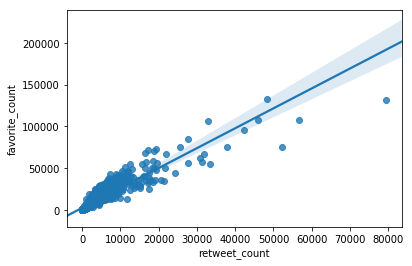

In [56]:
sb.regplot( dog_viz.retweet_count, dog_viz.favorite_count, data = dog_viz, fit_reg = True, x_jitter =0.3);

we can see that relationship between the favorite_count and the retweet_count is positive

### second insight

lets check the dog_breed with the highest ratings


In [57]:
dogbreed_counts=dog_viz.dog_breeds.value_counts()#[:20]

In [58]:
dog_rate=dog_viz.groupby(['dog_breeds'])['rating_numerator'].mean()#.nlargest(n=20, keep='first')

In [59]:
count_rates=dog_rate/dogbreed_counts
count_rates.nsmallest(n=20, keep='first')


Unknown                     0.055028
golden_retriever            0.078074
Chihuahua                   0.116667
Pembroke                    0.121548
Labrador_retriever          0.129138
pug                         0.165193
toy_poodle                  0.220000
Samoyed                     0.278345
chow                        0.295139
Pomeranian                  0.305770
malamute                    0.329660
Chesapeake_Bay_retriever    0.349636
French_bulldog              0.361082
cocker_spaniel              0.377778
miniature_pinscher          0.418403
Maltese_dog                 0.490305
beagle                      0.507500
Shih-Tzu                    0.517500
Eskimo_dog                  0.518595
German_shepherd             0.523810
dtype: float64

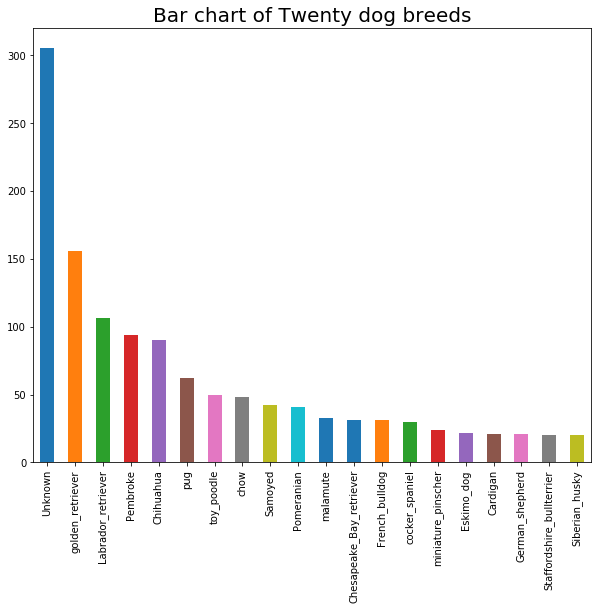

In [60]:
#lets prepare and horizpontal 
plt.figure(figsize=([10, 8]))
dogbreed_counts[:20].plot(kind='bar')
plt.title('Bar chart of Twenty dog breeds', fontsize=20);


we can see that the golden retriever has the highest counts i.e it is the most popular breed of dog

### Third insight

 let me check the most rated dog_breed

In [ ]:
#lets make a bar chart to visualize this since we already have dog_rate counts
plt.figure(figsize=(8, 8))
dog_rate.nlargest(n=20, keep='first').plot(kind= 'barh', legend=True)
plt.ylabel('Dog Breeds', fontsize=15)
plt.xlabel('Mean rated Dog Breed',fontsize=15);


the most rated dog breed is the dumber dog